<a href="https://colab.research.google.com/github/Kelzo8/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Preproccessing -Andrew

In [86]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

Load csv file

In [87]:
df.drop(columns=['Person ID'], inplace=True)

Drop person ID column as we don't need it

In [88]:
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(bp_split[0], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(columns=['Blood Pressure'], inplace=True)

Split Blood Pressure into Systolic and Diastolic

In [89]:

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

Encode all categorical variables

In [90]:
numerical_cols = ['Sleep Duration', 'Physical Activity Level', 'Stress Level',
                  'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
X = df[numerical_cols].values  # Select only numerical columns for scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

Standardize all numerical features

In [91]:
correlation_matrix = df.corr()

Compute correlation matrix

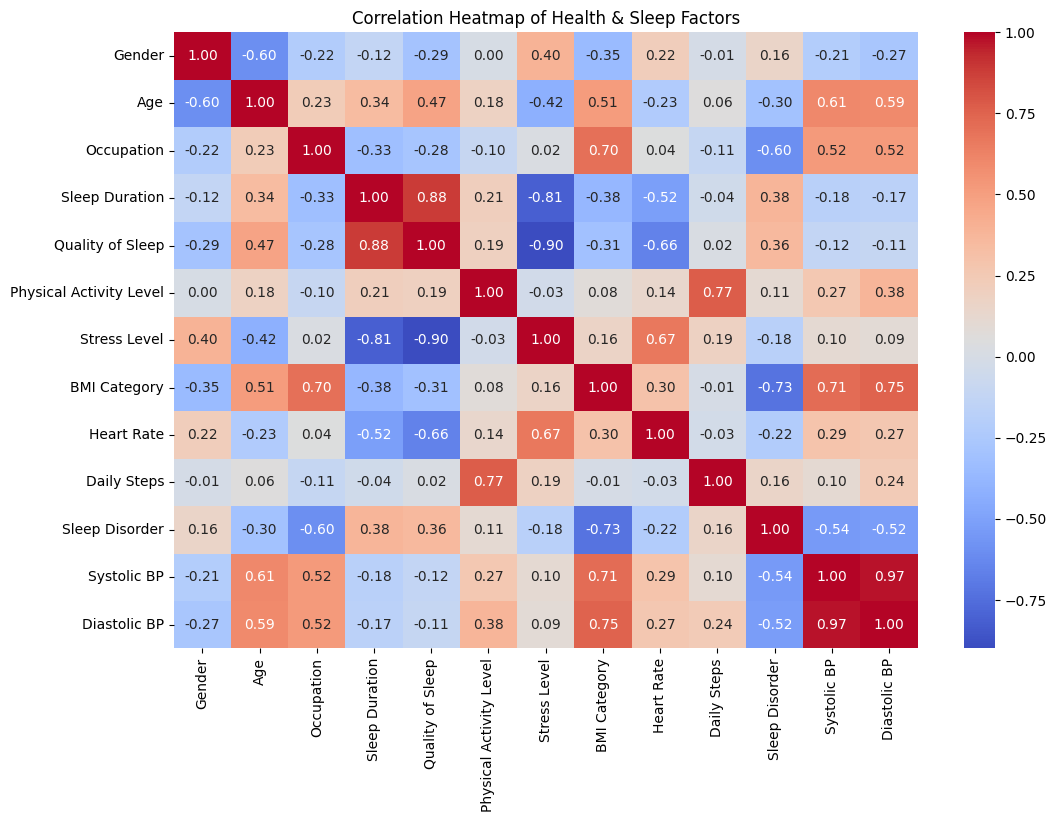

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Health & Sleep Factors')
plt.show()

In [93]:
df.to_csv('Processed_Sleep_Health_Dataset.csv', index=False)


In [94]:
correlation_matrix['Quality of Sleep'].sort_values(ascending=False)


,Quality of Sleep
Quality of Sleep,1.000000
Sleep Duration,0.883213
Age,0.473734
Sleep Disorder,0.357477
Physical Activity Level,0.192896
Daily Steps,0.016791
Diastolic BP,-0.110151
Systolic BP,-0.121632
Occupation,-0.278071
Gender,-0.291366


In [95]:
# Display dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,2,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90


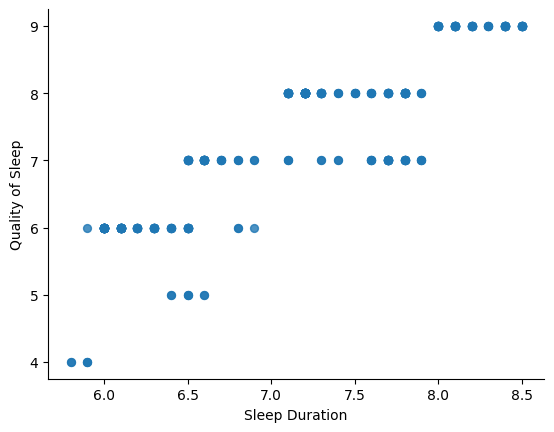

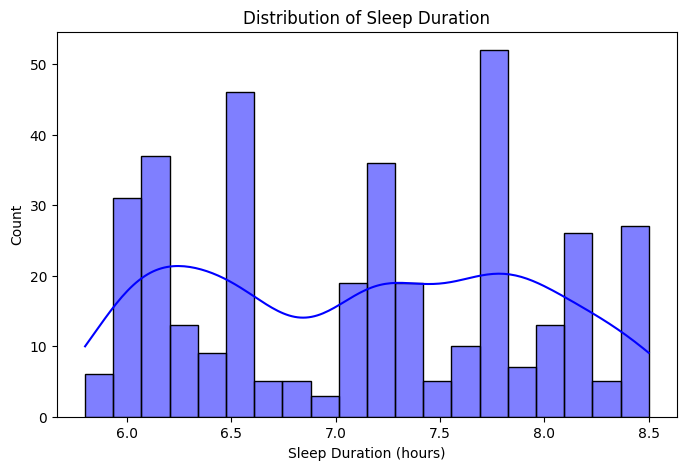

In [96]:
# Helps visualize whether sleep duration impacts sleep quality.
df.plot(kind='scatter', x='Sleep Duration', y='Quality of Sleep', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Shows how sleep duration is distributed among individuals.
plt.figure(figsize=(8, 5))
sns.histplot(df["Sleep Duration"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()

<ipython-input-97-24727e835453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")


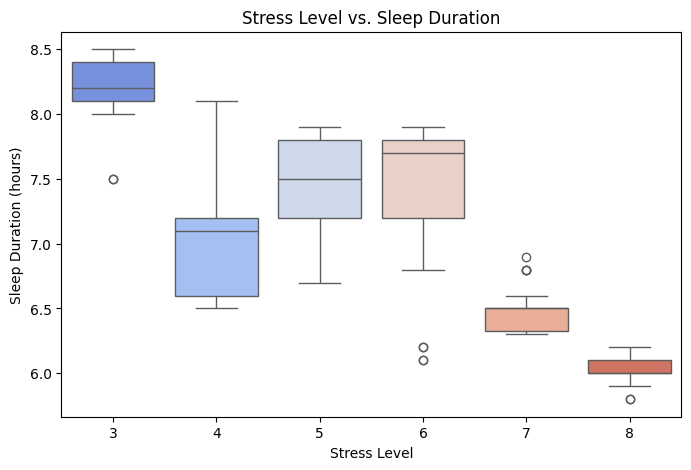

In [97]:
# Helps see how stress affects sleep duration.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")
plt.title("Stress Level vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

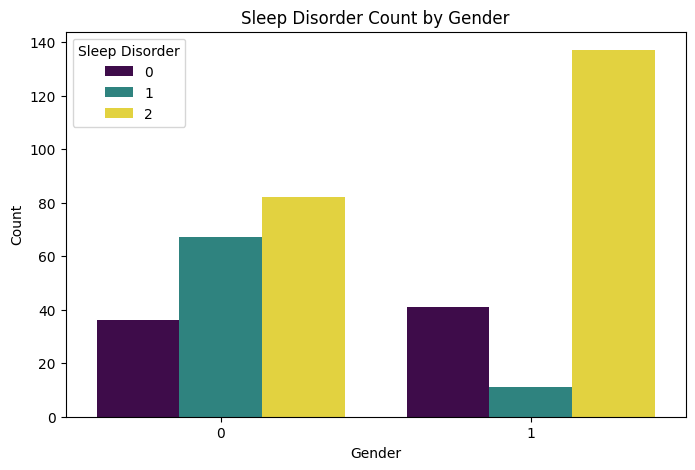

In [98]:
# Displays how sleep disorders vary between genders.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Sleep Disorder", palette="viridis")
plt.title("Sleep Disorder Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

In [99]:
# Encode categorical variables
label_enc = LabelEncoder()
df["Gender"] = label_enc.fit_transform(df["Gender"])
df["BMI Category"] = label_enc.fit_transform(df["BMI Category"])
df["Occupation"] = label_enc.fit_transform(df["Occupation"])

# Define features and target variable
X = df.drop(columns=["Quality of Sleep"]).values
y = df["Quality of Sleep"].values

In [100]:
# Scale features
scaler = StandardScaler()
df.info()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


In [101]:
# Define neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 54.1102 - mae: 7.2418 - val_loss: 39.7943 - val_mae: 6.1134
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.0189 - mae: 6.0332 - val_loss: 23.5043 - val_mae: 4.4624
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.1539 - mae: 4.0062 - val_loss: 9.6958 - val_mae: 2.4277
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1758 - mae: 2.3942 - val_loss: 4.3970 - val_mae: 1.5860
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3088 - mae: 1.1725 - val_loss: 2.2397 - val_mae: 1.2425
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4214 - mae: 0.9752 - val_loss: 1.5115 - val_mae: 0.9518
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3208 - mae: 0.8432 - val_loss: 1.1540 - val_mae: 0.8114
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0805 - mae: 0.7433 - val_loss: 0.9389 - val_mae: 0.6716
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step